# check data: ATP finals in the past 10 yrs
- processed data: finals extracted from ATP tournaments in the past 10 yrs (2008-2017), yr 2018 is not included because dataset is not complete
- explore data, and select parameters for prediction

<br>Lin Zhou, Sept 2018

In [10]:
#### imports ####
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os


# configurations
%matplotlib inline  
#save_path = 'analysis_results/'  # folder for saving analysis results 

In [11]:
#### Main ####

# import csv 
file_path = '../data/processed/finals_yr08-17.csv'
df_finals = pd.read_csv(file_path)  

## Explore ages of players


17.146165904 1.41604910171e-25
ages in finals are significantly different from each year


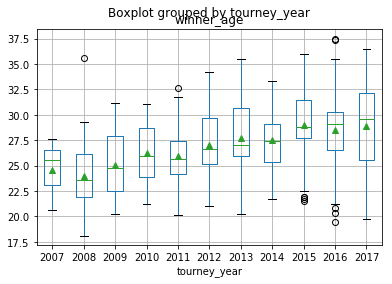

In [12]:
# plot distribution of winner age
final_age_plt = df_finals.boxplot(column = ['winner_age'], by = 'tourney_year', showmeans = True)

# one way ANOVA test on ages of players in finals, 
# p_value < 0.05: ages are significantly different; p_value > 0.05: ages are not significantly different
f_value, p_value = stats.f_oneway(df_finals['winner_age'][df_finals['tourney_year'] == 2008],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2009],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2010],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2011],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2012],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2013],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2014],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2015],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2016],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2017])

print(f_value, p_value)
if p_value <= 0.05:
    print('ages in finals are significantly different from each year')
else:
    print('ages in finals are not significantly different from each year')


so there seems to be an upward trend for ages of winners in tournaments, which is consistent with the fact that in recent years, top players remain amost always the same ones 
<br>let's confirm with linear regression?

In [ ]:
# linear regression to see if there's a linear increase of player age over the years

## Explore players who are winning the most 
1. Find ways to describe "most-winning": number of tournaments per player over the years?
2. Is number of wins per player consistent at different tournament levels?